In [27]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import h5py
import os
import scipy.io
os.getcwd()

'C:\\Users\\rahim035\\DNNs_SV'

In [28]:
f = h5py.File("Dic_CPR_rain_ocean.mat",'r')
list(f.keys())

['X_ocean_trn_detection',
 'X_ocean_tst_detection',
 'X_rain_ocean_trn_retrieval',
 'X_rain_ocean_tst_retrieval',
 'y_ocean_trn_detection',
 'y_ocean_tst_detection',
 'y_rain_ocean_trn_retrieval',
 'y_rain_ocean_tst_retrieval']

In [29]:
X0_trn_detection = f['X_ocean_trn_detection']
y0_trn_detection = f['y_ocean_trn_detection']
X0_tst_detection = f['X_ocean_tst_detection']
y0_tst_detection = f['y_ocean_tst_detection']

X0_trn_retrieval = f['X_rain_ocean_trn_retrieval']
y0_trn_retrieval = f['y_rain_ocean_trn_retrieval']
X0_tst_retrieval = f['X_rain_ocean_tst_retrieval']
y0_tst_retrieval = f['y_rain_ocean_tst_retrieval']

In [30]:
X1_trn_detection = np.transpose(X0_trn_detection)
X1_tst_detection = np.transpose(X0_tst_detection)
y_trn_detection = np.transpose(y0_trn_detection)
y_tst_detection = np.transpose(y0_tst_detection)

X1_trn_retrieval = np.transpose(X0_trn_retrieval)
X1_tst_retrieval = np.transpose(X0_tst_retrieval)
y_trn_retrieval = np.transpose(y0_trn_retrieval)
y_tst_retrieval = np.transpose(y0_tst_retrieval)

In [31]:
X1_trn_detection.astype('float64')
X1_tst_detection.astype('float64')
y_trn_detection.astype('int64')
y_tst_detection.astype('int64')

X1_trn_retrieval.astype('float64')
X1_tst_retrieval.astype('float64')
y_trn_retrieval.astype('float64')
y_tst_retrieval.astype('float64');

In [32]:
mean_detection = X1_trn_detection.mean(axis=0)
X2_trn_detection = X1_trn_detection-mean_detection
std_detection = X1_trn_detection.std(axis=0)
X_trn_detection = X2_trn_detection/std_detection
X2_tst_detection = X1_tst_detection-mean_detection
X_tst_detection = X2_tst_detection/std_detection

mean_retrieval = X1_trn_retrieval.mean(axis=0)
X2_trn_retrieval = X1_trn_retrieval-mean_retrieval
std_retrieval = X1_trn_retrieval.std(axis=0)
X_trn_retrieval = X2_trn_retrieval/std_retrieval
X2_tst_retrieval = X1_tst_retrieval-mean_retrieval
X_tst_retrieval = X2_tst_retrieval/std_retrieval

In [33]:
x_rain_lb = 0.01 #np.percentile(y_rain_trn_retrieval,0.05)
x_rain_ub = np.percentile(y_trn_retrieval,99.8675)
x_rain_lb, x_rain_ub

mask_trn_rain = (y_trn_retrieval>=x_rain_lb) & (y_trn_retrieval<=x_rain_ub)
m_trn_rain=mask_trn_rain[:,0]
mask_tst_rain = (y_tst_retrieval>=x_rain_lb) & (y_tst_retrieval<=x_rain_ub)
m_tst_rain=mask_tst_rain[:,0]

Xf_trn_detection = np.delete(X_trn_detection, ~m_trn_rain, axis=0)
yf_trn_detection = np.delete(y_trn_detection, ~m_trn_rain, axis=0)
Xf_tst_detection = np.delete(X_tst_detection, ~m_tst_rain, axis=0)
yf_tst_detection = np.delete(y_tst_detection, ~m_tst_rain, axis=0)

Xf_trn_retrieval = np.delete(X_trn_retrieval, ~m_trn_rain, axis=0)
yf_trn_retrieval = np.delete(y_trn_retrieval, ~m_trn_rain, axis=0)
Xf_tst_retrieval = np.delete(X_tst_retrieval, ~m_tst_rain, axis=0)
yf_tst_retrieval = np.delete(y_tst_retrieval, ~m_tst_rain, axis=0)

In [34]:
print('***Training Dataset:\n')

n_snow=1
n_rain=1
n_clear=1  
t_train = np.zeros([y_trn_detection.shape[0],1])

for i in range(len(X_trn_detection)):
    label = y_trn_detection[i]
    if label==5:
        n_snow+=1
        t_train[i]=2
    if label==3:
        n_rain+=1  
        t_train[i]=1
    if label==0:
        n_clear+=1
        t_train[i]=0
        
print('Num. of snowfall:',n_snow)
print('Num. of rainfall:',n_rain)
print('Num. of clear-sky:',n_clear)

print('\n***Testing Dataset:\n')

n_snow=1
n_rain=1
n_clear=1  
t_test = np.zeros([y_tst_detection.shape[0],1])

for i in range(len(X_tst_detection)):
    label = y_tst_detection[i]
    if label==5:
        n_snow+=1
        t_test[i]=2
    if label==3:
        n_rain+=1  
        t_test[i]=1
    if label==0:
        n_clear+=1
        t_test[i]=0
        
print('Num. of snowfall:',n_snow)
print('Num. of rainfall:',n_rain)
print('Num. of clear-sky:',n_clear)

print('\n***Truth Checking:\n')

n_snow=1
n_rain=1
n_clear=1  
tf_test = np.zeros([yf_tst_detection.shape[0],1])

for i in range(len(Xf_tst_detection)):
    label = yf_tst_detection[i]
    if label==5:
        n_snow+=1
        tf_test[i]=2
    if label==3:
        n_rain+=1  
        tf_test[i]=1
    if label==0:
        n_clear+=1
        tf_test[i]=0
        
print('Num. of snowfall:',n_snow)
print('Num. of rainfall:',n_rain)
print('Num. of clear-sky:',n_clear)

***Training Dataset:

Num. of snowfall: 38683
Num. of rainfall: 38007
Num. of clear-sky: 73364

***Testing Dataset:

Num. of snowfall: 16346
Num. of rainfall: 16500
Num. of clear-sky: 31469

***Truth Checking:

Num. of snowfall: 1
Num. of rainfall: 11212
Num. of clear-sky: 1


In [35]:
from tensorflow.keras.utils import to_categorical

t_trn_detection = to_categorical(t_train)
t_tst_detection = to_categorical(t_test)

## DNN - Detection Module

In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers, Sequential

In [11]:
# Parameters
hidden_units = 30
dropout = 0

# Detection Module
model_detection = Sequential()

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(3))
model_detection.add(Activation('softmax'))

In [12]:
model_detection.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics= [tf.keras.metrics.Recall()])

In [13]:
from tensorflow import keras
callbacks_list = [
    keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=25,),
    keras.callbacks.ModelCheckpoint(
    filepath="checkpoint_path.keras",
    monitor="val_loss",
    save_best_only=True,
    )    
]

In [14]:
print('\nFitting DNN (Detection Module):\n')
batch_size1 = 500
history_detection = model_detection.fit(X_trn_detection, t_trn_detection, epochs=400,
                                validation_split=.2, batch_size = batch_size1,
                                callbacks=callbacks_list, verbose=1)


Fitting DNN (Detection Module):

Epoch 1/400
241/241 [==============================] - 2s 4ms/step - loss: 0.9190 - recall: 0.1843 - val_loss: 0.6936 - val_recall: 0.5934
Epoch 2/400
241/241 [==============================] - 1s 3ms/step - loss: 0.4919 - recall: 0.7843 - val_loss: 0.3704 - val_recall: 0.8484
Epoch 3/400
241/241 [==============================] - 1s 3ms/step - loss: 0.3395 - recall: 0.8606 - val_loss: 0.3147 - val_recall: 0.8715
Epoch 4/400
241/241 [==============================] - 1s 3ms/step - loss: 0.2954 - recall: 0.8786 - val_loss: 0.2804 - val_recall: 0.8872
Epoch 5/400
241/241 [==============================] - 1s 3ms/step - loss: 0.2639 - recall: 0.8927 - val_loss: 0.2532 - val_recall: 0.8985
Epoch 6/400
241/241 [==============================] - 1s 3ms/step - loss: 0.2460 - recall: 0.9014 - val_loss: 0.2434 - val_recall: 0.9038
Epoch 7/400
241/241 [==============================] - 1s 3ms/step - loss: 0.2359 - recall: 0.9056 - val_loss: 0.2363 - val_recall: 

241/241 [==============================] - 1s 3ms/step - loss: 0.1790 - recall: 0.9290 - val_loss: 0.1857 - val_recall: 0.9261
Epoch 118/400
241/241 [==============================] - 1s 2ms/step - loss: 0.1789 - recall: 0.9286 - val_loss: 0.1962 - val_recall: 0.9215
Epoch 119/400
241/241 [==============================] - 1s 2ms/step - loss: 0.1788 - recall: 0.9283 - val_loss: 0.1877 - val_recall: 0.9245
Epoch 120/400
241/241 [==============================] - 1s 2ms/step - loss: 0.1788 - recall: 0.9284 - val_loss: 0.2035 - val_recall: 0.9172
Epoch 121/400
241/241 [==============================] - 1s 2ms/step - loss: 0.1787 - recall: 0.9289 - val_loss: 0.1898 - val_recall: 0.9229
Epoch 122/400
241/241 [==============================] - 1s 2ms/step - loss: 0.1785 - recall: 0.9288 - val_loss: 0.1927 - val_recall: 0.9231
Epoch 123/400
241/241 [==============================] - 1s 2ms/step - loss: 0.1785 - recall: 0.9290 - val_loss: 0.1864 - val_recall: 0.9257
Epoch 124/400
241/241 [====

Epoch 175/400
241/241 [==============================] - 1s 2ms/step - loss: 0.1745 - recall: 0.9302 - val_loss: 0.1852 - val_recall: 0.9256
Epoch 176/400
241/241 [==============================] - 1s 2ms/step - loss: 0.1743 - recall: 0.9303 - val_loss: 0.1848 - val_recall: 0.9262
Epoch 177/400
241/241 [==============================] - 1s 2ms/step - loss: 0.1740 - recall: 0.9303 - val_loss: 0.1928 - val_recall: 0.9244
Epoch 178/400
241/241 [==============================] - 1s 2ms/step - loss: 0.1740 - recall: 0.9305 - val_loss: 0.1854 - val_recall: 0.9250
Epoch 179/400
241/241 [==============================] - 1s 2ms/step - loss: 0.1741 - recall: 0.9302 - val_loss: 0.1853 - val_recall: 0.9278
Epoch 180/400
241/241 [==============================] - 1s 2ms/step - loss: 0.1740 - recall: 0.9305 - val_loss: 0.1901 - val_recall: 0.9242
Epoch 181/400
241/241 [==============================] - 1s 2ms/step - loss: 0.1741 - recall: 0.9301 - val_loss: 0.1844 - val_recall: 0.9259
Epoch 182/400

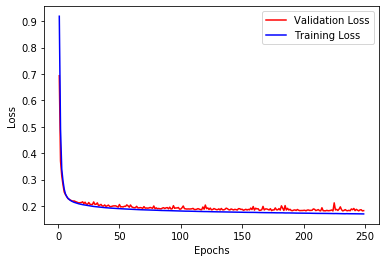

In [16]:
import matplotlib.pyplot as plt

val_loss = history_detection.history["val_loss"]
loss = history_detection.history["loss"]

epochs = range(1, 250)
plt.plot(epochs, val_loss[:], "r-",
label="Validation Loss")
plt.plot(epochs, loss[:], "b-",
label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [17]:
predictions_label = model_detection.predict(X_tst_detection)
predictions_label_rain = model_detection.predict(Xf_tst_detection)

In [18]:
y_pred = np.zeros([len(X_tst_detection),1])
for i in range(len(X_tst_detection)):
    y_pred[i,0] = np.argmax(predictions_label[i])
    
y_pred_rain = np.zeros([len(Xf_tst_detection),1])
for i in range(len(Xf_tst_detection)):
    y_pred_rain[i,0] = np.argmax(predictions_label_rain[i])    

### Metrics

In [19]:
### Detection Module

n_cc=1
n_cs=1
n_cr=1
n_sc=1
n_ss=1
n_sr=1
n_rc=1
n_rs=1
n_rr=1

precip_c= 0
precip_r= 1
precip_s= 2

for i in range(len(X_tst_detection)):
    label_predict = y_pred[i]
    label_actual = t_test[i]
    if label_predict==precip_c and label_actual==precip_c:
        n_cc+=1
    if label_predict==precip_s and label_actual==precip_s:
        n_ss+=1
    if label_predict==precip_r and label_actual==precip_r:
        n_rr+=1 
    if label_predict==precip_c and label_actual==precip_s:
        n_cs+=1
    if label_predict==precip_c and label_actual==precip_r:
        n_cr+=1
    if label_predict==precip_s and label_actual==precip_c:
        n_sc+=1
    if label_predict==precip_s and label_actual==precip_r:
        n_sr+=1  
    if label_predict==precip_r and label_actual==precip_c:
        n_rc+=1
    if label_predict==precip_r and label_actual==precip_s:
        n_rs+=1        
        
#Snow
TP_s = n_ss
TN_s = n_cc+n_cr+n_rc+n_rr
FP_s = n_sc+n_sr
FN_s = n_cs+n_rs

precision_s = TP_s/(TP_s+FP_s)
acc_s = (TP_s+TN_s)/(TP_s+TN_s+FP_s+FN_s)
recall_s = TP_s/(TP_s+FN_s)
f1_score_s = (2*precision_s*recall_s)/(precision_s+recall_s)
FPR_s = FP_s/(FP_s+TN_s)

#Rain
TP_r = n_rr
TN_r = n_cc+n_cs+n_sc+n_ss
FP_r = n_rc+n_rs
FN_r = n_cr+n_sr

precision_r = TP_r/(TP_r+FP_r)
acc_r = (TP_r+TN_r)/(TP_r+TN_r+FP_r+FN_r)
recall_r = TP_r/(TP_r+FN_r)
f1_score_r = (2*precision_r*recall_r)/(precision_r+recall_r)
FPR_r = FP_r/(FP_r+TN_r) 

print('\n For Rainfall Detection Over Ocean:\n')
print('Precision: ',precision_r)
print('Accuracy: ',acc_r)
print('Recall (TPR): ',recall_r)
print('False Alarm (FPR): ',FPR_r)
print('\nF1 Score: ',f1_score_r)

print('----------------------------')
print('\n For Snwofall Detection Over Ocean:\n')
print('Precision: ',precision_s)
print('Accuracy: ',acc_s)
print('Recall (TPR): ',recall_s)
print('False Alarm (FPR): ',FPR_s)
print('\nF1 Score: ',f1_score_s)

#Model
TP = n_cc+n_ss+n_rr
FP = n_cs+n_cr+n_sc+n_sr+n_rc+n_rs
FN = n_sc+n_rc+n_cs+n_rs+n_cr+n_sr

precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = (2*precision*recall)/(precision+recall)

print('----------------------------')
print('\n For Model Detection Over Ocean:\n')
print('Precision: ',precision)
print('Recall (TPR): ',recall)
print('\nF1 Score: ',f1_score)


 For Rainfall Detection Over Ocean:

Precision:  0.9120445162448394
Accuracy:  0.9575721770494862
Recall (TPR):  0.9237062174281905
False Alarm (FPR):  0.030740918881616095

F1 Score:  0.9178383260575042
----------------------------

 For Snwofall Detection Over Ocean:

Precision:  0.9232435597189695
Accuracy:  0.9706161284805895
Recall (TPR):  0.9645828235869831
False Alarm (FPR):  0.027327871927959477

F1 Score:  0.9434605719755892
----------------------------

 For Model Detection Over Ocean:

Precision:  0.9282349465959795
Recall (TPR):  0.9282349465959795

F1 Score:  0.9282349465959795


In [20]:
model_detection.evaluate(X_tst_detection, t_tst_detection, batch_size = batch_size1)

129/129 [==============================] - 0s 1ms/step - loss: 0.1812 - recall: 0.9283


[0.1811523139476776, 0.928318202495575]

## DNN - Retrieval Module

In [37]:
from tensorflow.keras import backend
def root_mean_squared_error(y_true, y_pred):
        return backend.sqrt(backend.mean(backend.square(y_pred-y_true)))
    
def mean_absolute_error(y_true, y_pred):
        return backend.mean(backend.abs(y_pred-y_true))        

### Rain

In [38]:
# Parameters
hidden_units = 60
dropout = 0

# OCEAN
model_retrieval = Sequential()

model_retrieval.add(Dense(hidden_units))
model_retrieval.add(Activation('relu'))
model_retrieval.add(Dropout(dropout))

model_retrieval.add(Dense(hidden_units))
model_retrieval.add(Activation('relu'))
model_retrieval.add(Dropout(dropout))

model_retrieval.add(Dense(hidden_units))
model_retrieval.add(Activation('relu'))
model_retrieval.add(Dropout(dropout))

model_retrieval.add(Dense(hidden_units))
model_retrieval.add(Activation('relu'))
model_retrieval.add(Dropout(dropout))

model_retrieval.add(Dense(hidden_units))
model_retrieval.add(Activation('relu'))
model_retrieval.add(Dropout(dropout))

model_retrieval.add(Dense(hidden_units))
model_retrieval.add(Activation('relu'))
model_retrieval.add(Dropout(dropout))

model_retrieval.add(Dense(1))
model_retrieval.add(Activation('relu'))

In [39]:
model_retrieval.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00001),
              loss = root_mean_squared_error,
              metrics= mean_absolute_error)

In [40]:
from tensorflow import keras
callbacks_list = [
    keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=25,),
    keras.callbacks.ModelCheckpoint(
    filepath="checkpoint_path.keras",
    monitor="val_loss",
    mode="min",
    save_best_only=True,
    )    
]

In [41]:
print('\nFitting DNN (Retrieval Module - Rain):\n')
batch_size2 = 100
history_retrieval = model_retrieval.fit(Xf_trn_retrieval, yf_trn_retrieval, epochs=400,
                                validation_split=.2, batch_size = batch_size2,
                                callbacks=callbacks_list, verbose=1)


Fitting DNN (Retrieval Module - Rain):

Epoch 1/400
207/207 [==============================] - 0s 2ms/step - loss: 5.7741 - mean_absolute_error: 2.3382 - val_loss: 6.0381 - val_mean_absolute_error: 2.4310
Epoch 2/400
207/207 [==============================] - 0s 2ms/step - loss: 5.7294 - mean_absolute_error: 2.3110 - val_loss: 5.9637 - val_mean_absolute_error: 2.3735
Epoch 3/400
207/207 [==============================] - 0s 2ms/step - loss: 5.6694 - mean_absolute_error: 2.2753 - val_loss: 5.8771 - val_mean_absolute_error: 2.3432
Epoch 4/400
207/207 [==============================] - 0s 2ms/step - loss: 5.5908 - mean_absolute_error: 2.2530 - val_loss: 5.7914 - val_mean_absolute_error: 2.3268
Epoch 5/400
207/207 [==============================] - 0s 2ms/step - loss: 5.5106 - mean_absolute_error: 2.2442 - val_loss: 5.7114 - val_mean_absolute_error: 2.3194
Epoch 6/400
207/207 [==============================] - 0s 2ms/step - loss: 5.4710 - mean_absolute_error: 2.2497 - val_loss: 5.6385 - v

207/207 [==============================] - 0s 2ms/step - loss: 4.0296 - mean_absolute_error: 1.6513 - val_loss: 4.0434 - val_mean_absolute_error: 1.7058
Epoch 100/400
207/207 [==============================] - 0s 2ms/step - loss: 4.0443 - mean_absolute_error: 1.6627 - val_loss: 4.0404 - val_mean_absolute_error: 1.6823
Epoch 101/400
207/207 [==============================] - 0s 2ms/step - loss: 4.0518 - mean_absolute_error: 1.6531 - val_loss: 4.0407 - val_mean_absolute_error: 1.7159
Epoch 102/400
207/207 [==============================] - 0s 2ms/step - loss: 4.0655 - mean_absolute_error: 1.6600 - val_loss: 4.0375 - val_mean_absolute_error: 1.6837
Epoch 103/400
207/207 [==============================] - 0s 2ms/step - loss: 4.0353 - mean_absolute_error: 1.6553 - val_loss: 4.0367 - val_mean_absolute_error: 1.6903
Epoch 104/400
207/207 [==============================] - 0s 2ms/step - loss: 4.0370 - mean_absolute_error: 1.6504 - val_loss: 4.0348 - val_mean_absolute_error: 1.6723
Epoch 105/40

Epoch 197/400
207/207 [==============================] - 0s 2ms/step - loss: 3.9684 - mean_absolute_error: 1.5721 - val_loss: 3.9525 - val_mean_absolute_error: 1.6242
Epoch 198/400
207/207 [==============================] - 0s 2ms/step - loss: 3.9187 - mean_absolute_error: 1.5722 - val_loss: 3.9546 - val_mean_absolute_error: 1.5720
Epoch 199/400
207/207 [==============================] - 0s 2ms/step - loss: 3.9273 - mean_absolute_error: 1.5711 - val_loss: 3.9520 - val_mean_absolute_error: 1.5884
Epoch 200/400
207/207 [==============================] - 0s 2ms/step - loss: 3.9664 - mean_absolute_error: 1.5703 - val_loss: 3.9503 - val_mean_absolute_error: 1.6184
Epoch 201/400
207/207 [==============================] - 0s 2ms/step - loss: 3.9502 - mean_absolute_error: 1.5693 - val_loss: 3.9499 - val_mean_absolute_error: 1.6260
Epoch 202/400
207/207 [==============================] - 0s 2ms/step - loss: 3.9271 - mean_absolute_error: 1.5689 - val_loss: 3.9495 - val_mean_absolute_error: 1.635

207/207 [==============================] - 0s 2ms/step - loss: 3.8999 - mean_absolute_error: 1.5492 - val_loss: 3.9146 - val_mean_absolute_error: 1.5762
Epoch 247/400
207/207 [==============================] - 0s 2ms/step - loss: 3.9253 - mean_absolute_error: 1.5512 - val_loss: 3.9140 - val_mean_absolute_error: 1.5872
Epoch 248/400
207/207 [==============================] - 0s 2ms/step - loss: 3.9255 - mean_absolute_error: 1.5524 - val_loss: 3.9130 - val_mean_absolute_error: 1.5729
Epoch 249/400
207/207 [==============================] - 0s 2ms/step - loss: 3.9300 - mean_absolute_error: 1.5487 - val_loss: 3.9134 - val_mean_absolute_error: 1.5782
Epoch 250/400
207/207 [==============================] - 0s 2ms/step - loss: 3.8871 - mean_absolute_error: 1.5499 - val_loss: 3.9145 - val_mean_absolute_error: 1.5941
Epoch 251/400
207/207 [==============================] - 0s 2ms/step - loss: 3.8952 - mean_absolute_error: 1.5477 - val_loss: 3.9120 - val_mean_absolute_error: 1.5654
Epoch 252/40

207/207 [==============================] - 0s 2ms/step - loss: 3.8352 - mean_absolute_error: 1.5145 - val_loss: 3.8699 - val_mean_absolute_error: 1.5649
Epoch 345/400
207/207 [==============================] - 0s 2ms/step - loss: 3.8095 - mean_absolute_error: 1.5120 - val_loss: 3.8688 - val_mean_absolute_error: 1.5419
Epoch 346/400
207/207 [==============================] - 0s 2ms/step - loss: 3.8291 - mean_absolute_error: 1.5099 - val_loss: 3.8709 - val_mean_absolute_error: 1.5791
Epoch 347/400
207/207 [==============================] - 0s 2ms/step - loss: 3.8085 - mean_absolute_error: 1.5098 - val_loss: 3.8700 - val_mean_absolute_error: 1.5782
Epoch 348/400
207/207 [==============================] - 0s 2ms/step - loss: 3.8254 - mean_absolute_error: 1.5257 - val_loss: 3.8691 - val_mean_absolute_error: 1.5623
Epoch 349/400
207/207 [==============================] - 0s 2ms/step - loss: 3.8218 - mean_absolute_error: 1.5093 - val_loss: 3.8690 - val_mean_absolute_error: 1.5716
Epoch 350/40

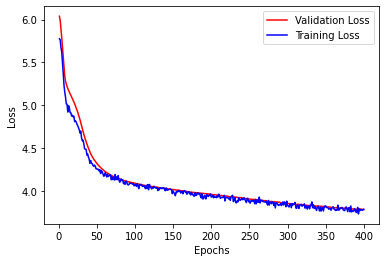

In [20]:
import matplotlib.pyplot as plt
val_loss = history_retrieval.history["val_loss"]
loss = history_retrieval.history["loss"]

epochs = range(1, 401)
plt.plot(epochs, val_loss[:], "r-",
label="Validation Loss")
plt.plot(epochs, loss[:], "b-",
label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [21]:
predictions_rain = model_retrieval.predict(Xf_tst_retrieval)

### Evaluation

In [22]:
model_retrieval.evaluate(Xf_tst_retrieval, yf_tst_retrieval, batch_size = batch_size2)

113/113 [==============================] - 0s 388us/step - loss: 4.6777 - mean_absolute_error: 1.8137


[4.677733898162842, 1.8136844635009766]

# Checking Outputs

In [24]:
from scipy.stats import gaussian_kde
x = yf_tst_retrieval
y = predictions_rain
idx_rain = (x>0) & (y>0)
mask_TP=idx_rain[:,0]
y = np.delete(y, ~mask_TP)
x = np.delete(x, ~mask_TP)
xy = np.vstack([np.log(x),np.log(y)])
z = gaussian_kde(xy)(xy)

In [25]:
rmse = np.sqrt(np.mean(np.square(x-y)))
mae = np.mean(np.abs(x-y))
bias = np.sum(x-y)/len(x)
print('RMSE rain:', rmse, 'mm/hr')
print('MAE rain:', mae, 'mm/hr')
print('bias snow:', bias, 'mm/hr')

RMSE rain: 5.011887174907652 mm/hr
MAE rain: 1.9343443589522762 mm/hr
bias snow: 0.22234487319388005 mm/hr


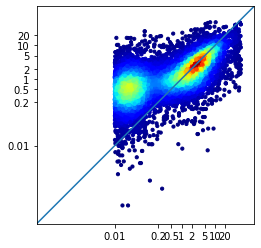

In [26]:
fig, ax = plt.subplots()
ax.scatter(np.log(x), np.log(y), c=z, s=10, cmap= 'jet')
plt.plot([-10, 5], [-10, 5])
ax.set_xlim(-10, 5)
ax.set_ylim(-10, 5)
ax.set_aspect('equal', adjustable='box')
ax.set_xticks([np.log(0.01), np.log(0.2), np.log(0.5), np.log(1), np.log(2) , np.log(5) , np.log(10) , np.log(20)])
ax.set_xticklabels(['0.01','0.2','0.5', '1', '2', '5', '10', '20'])
ax.set_yticks([np.log(0.01), np.log(0.2), np.log(0.5), np.log(1), np.log(2), np.log(5) , np.log(10), np.log(20)])
ax.set_yticklabels(['0.01','0.2','0.5', '1', '2', '5', '10', '20'])
plt.show()

In [36]:
model_retrieval.save('Models\CPR\Ocean\model_rain',save_format='h5')

In [37]:
import scipy
from scipy.io import savemat

fp_CPR_ocean_RR = 'Models/CPR/Ocean/files_CPR_ocean_RR.mat'
scipy.io.savemat(fp_CPR_ocean_RR, {'mean_rain_retrieval_CPR_ocean_RR': mean_retrieval,'std_rain_retrieval_CPR_ocean_RR':std_retrieval})

In [1]:

os.getcwd()

NameError: name 'os' is not defined

## Save Files

In [ ]:
import scipy
from scipy.io import savemat

fp_DNN_detection = 'label_pred_rain_ocean_CPR.mat'
fp_actual_detection = 't_test_label_rain_ocean_CPR.mat'
scipy.io.savemat(fp_DNN_detection, {'label_pred_rain_ocean_CPR': y_pred_rain})
scipy.io.savemat(fp_actual_detection, {'t_test_label_rain_ocean_CPR': tf_test})

fp_DNN_retrieval = 'rate_pred_rain_ocean_CPR.mat'
fp_actual_retrieval = 't_test_rate_rain_ocean_CPR.mat'
scipy.io.savemat(fp_DNN_retrieval, {'rate_pred_rain_ocean_CPR': predictions_rain})
scipy.io.savemat(fp_actual_retrieval, {'t_test_rate_rain_ocean_CPR': yf_tst_retrieval})

## Observation Orbits

In [ ]:
g = h5py.File("Orbital/Orbit6308_dics.mat",'r')
list(g.keys())

In [ ]:
X0_detection = g['X_detection']
X1_detection = np.transpose(X0_detection)
X2_detection = np.transpose(X1_detection)

X0_retrieval = g['x_retrieval_CPR_rain_ocean']
X1_retrieval = np.transpose(X0_retrieval)

In [ ]:
X3_detection = X2_detection-mean_detection
X_detection = X3_detection/std_detection

X2_retrieval = X1_retrieval-mean_retrieval
X_retrieval = X2_retrieval/std_retrieval

In [ ]:
label_pred_obs = model_detection.predict(X_detection)

In [ ]:
y_pred_obs = np.zeros([len(X_detection),1])
for i in range(len(X_detection)):
    y_pred_obs[i,0] = np.argmax(label_pred_obs[i])

In [ ]:
np.sum(np.isnan(X0_retrieval))

In [ ]:
rate_pred_obs = model_retrieval.predict(X_retrieval)

In [ ]:
import scipy
from scipy.io import savemat

fp_detection = 'label_pred_rain_ocean_CPR_6308.mat'
fp_retrieval = 'rate_pred_rain_ocean_CPR_6308.mat'
scipy.io.savemat(fp_detection, {'label_pred_rain_ocean_CPR': y_pred_obs})
scipy.io.savemat(fp_retrieval, {'rate_pred_rain_ocean_CPR': rate_pred_obs})                          